###  Text Mining & Image Recognition
### Laboratorio # 1

Instrucciones: A continuación verá una lista de ejercicios que debe completar para poder entregar el laboratorio __#1.__ Para desarrollar su solución deberá utilizar un Notebook el cual contenga todos los ejercicios indicando cada uno de ellos expl´ıcitamente con sus resultados. Para la entrega deberá subir un link al repositorio de github el cual contiene su solución.

__Problema 1:__

Desarrolle una funcion la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:

* Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
* Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
* Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
* Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
* Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
* Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

#### Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def color_imagen(imagen, color):
    # Cargando la imagen para leerlo
    img = cv2.imread(imagen)
    
    # Convertir la imagen a RGB (OpenCV carga imágenes como BGR por defecto)
    imagen_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # Copiar la imagen para no modificar la original
    filtro_imagen = imagen_rgb.copy()
    
    # Quitando los canales de color
    filtro_imagen[:, :, 0] = 0 # Canal Azul
    filtro_imagen[:, :, 1] = 0 # Canal verde
    filtro_imagen[:, :, 2] = 0 # Canal Rojo
    
    # Creando las reglas, para ingresar el parámetro de color 
    if color == 1:
         filtro_imagen[:, :, 2] = imagen_rgb[:, :, 2]  # Activa solo el canal azul
    elif color == 2:
        filtro_imagen[:, :, 1] = imagen_rgb[:, :, 1]  # Activa solo el canal Verde
    elif color == 3:
        filtro_imagen[:, :, 0] = imagen_rgb[:, :, 0]  # Activa solo el canal Rojo
    elif color == 10:
        filtro_imagen[:, :, 0] = imagen_rgb[:, :, 0]  # Activa solo el canal Rojo
        filtro_imagen[:, :, 1] = imagen_rgb[:, :, 1]  # Activa solo el canal Verde
    elif color == 20:
        filtro_imagen[:, :, 1] = imagen_rgb[:, :, 1]  # Activa solo el canal Verde
        filtro_imagen[:, :, 2] = imagen_rgb[:, :, 2]  # Activa solo el canal Azul
    elif color == 30:
        filtro_imagen[:, :, 2] = imagen_rgb[:, :, 2]  # Activa solo el canal Azul
        filtro_imagen[:, :, 0] = imagen_rgb[:, :, 0]  # Activa solo el canal Rojo
    else:
        print("El valor del parámetro de color debe ser 1, 2, 3, 10, 20 o 30.")
        return None
    return filtro_imagen


#### Imagen Original

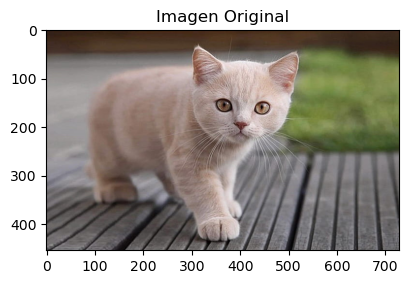

In [4]:
img = cv2.imread("gato.jpg")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('on')
plt.show()

#### Imagen modificada

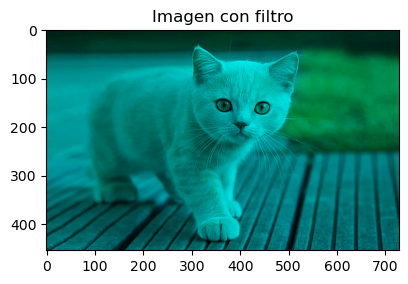

In [10]:
img_modificada=color_imagen("gato.jpg", 20)
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 2)
plt.imshow(img_modificada)
plt.title('Imagen con filtro')
plt.axis('on')
plt.show()

__Problema 2:__
En el .zip del laboratorio se le compartió un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.



In [12]:
def reconstruct_color_image(grayscale_images):
    # Verificar que se hayan proporcionado exactamente 3 imágenes
    if len(grayscale_images) != 3:
        print("Se requieren exactamente 3 imágenes en escala de grises.")
        return None

    # Convertir cada imagen en escala de grises en un canal de color
    b_channel = grayscale_images[0]
    g_channel = grayscale_images[1]
    r_channel = grayscale_images[2]

    # Apilar los canales de color para crear la imagen RGB
    color_image = np.stack([b_channel, g_channel, r_channel], axis=-1)

    return color_image


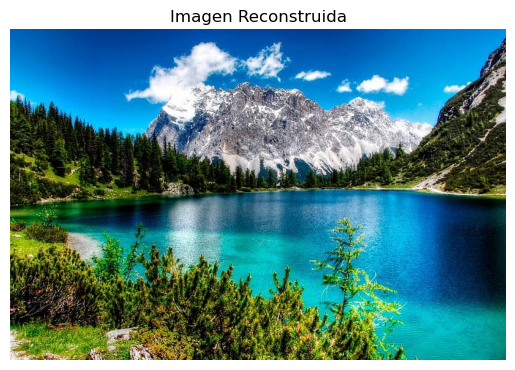

In [16]:
image_b = cv2.imread('imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
image_g = cv2.imread('imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
image_r = cv2.imread('imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)

if image_b is None or image_g is None or image_r is None:
    print("Error al cargar las imágenes.")
else:
    # Llamar a la función para reconstruir la imagen a color
    color_image = reconstruct_color_image([image_b, image_g, image_r])

    # Mostrar la imagen reconstruida en una figura de matplotlib
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Reconstruida')
    plt.axis('off')
    plt.show()